In [ ]:
################################################################################################################################
#                                                                                                                              #
#  Problem Statement: Insurance Fraud Detection                                                                                #
#                                                                                                                              #
#  Do the following task:                                                                                                      #
#    1. Check every feature one by one                                                                                         #
#      (Analyze the dataset using pandas functions)                                                                            #
#    2. Handle missing values, Detect outliers, Convert Object data into numerical                                             #
#    3. Feature selection techniques: Use correlation, wrapper method and Embedded method                                      #
#    4. Train model on different algorithms by using hyperparameter                                                            #
#    5. Check the accuracy, different matrix on training and testing dataset.                                                  #
#                                                                                                                              #
#  Input Dataset : Insurance_Fraud_Detection.csv                                                                               #
#                                                                                                                              #
#  Author : Anant Krushna Mahadik                                                                                              #
#                                                                                                                              #
#  Date : 20-02-2024                                                                                                           #
#                                                                                                                              #
################################################################################################################################


# import library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# import data

In [2]:
df = pd.read_csv('Insurance_Fraud_Detection.csv')

# Data Operations

In [3]:
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
df.isna().sum()
# df.isnull().sum()  # check null values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:

# Replace '?' and 'nan' with NaN
df.replace({'?': pd.NA, 'nan': pd.NA}, inplace=True)


In [11]:
df['months_as_customer']

0      328
1      228
2      134
3      256
4      228
      ... 
995      3
996    285
997    130
998    458
999    456
Name: months_as_customer, Length: 1000, dtype: int64

In [12]:
df['months_as_customer'].isna().sum()

0

In [13]:
df['age']

0      48
1      42
2      29
3      41
4      44
       ..
995    38
996    41
997    34
998    62
999    60
Name: age, Length: 1000, dtype: int64

In [14]:
auth_mean = df['authorities_contacted'].mode()

In [15]:
df['authorities_contacted'].fillna(auth_mean, inplace = True)

In [16]:
c_mode = df['_c39'].mode()

In [17]:
df['_c39'].fillna(c_mode, inplace = True)

In [18]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,<NA>,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [20]:
# df['policy_bind_date'] =pd.to_datetime(df['policy_bind_date'])
label_encoder = LabelEncoder()
df['policy_bind_date'] = label_encoder.fit_transform(df['policy_bind_date'])

In [21]:
df['policy_bind_date']

0      940
1      635
2      413
3       19
4      922
      ... 
995     67
996    907
997    514
998    831
999    283
Name: policy_bind_date, Length: 1000, dtype: int32

In [22]:
df['policy_state']

0      OH
1      IN
2      OH
3      IL
4      IL
       ..
995    OH
996    IL
997    OH
998    IL
999    OH
Name: policy_state, Length: 1000, dtype: object

In [23]:
label_encoder = LabelEncoder()
df['policy_state'] = label_encoder.fit_transform(df['policy_state'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [25]:
df['policy_csl'].head(9)

0     250/500
1     250/500
2     100/300
3     250/500
4    500/1000
5     250/500
6     250/500
7     100/300
8     100/300
Name: policy_csl, dtype: object

In [26]:
# convert object to date time
# df['policy_csl'] = pd.to_datetime(df['policy_csl'])

df['policy_csl'] = label_encoder.fit_transform(df['policy_csl'])

In [27]:
df['policy_csl'].head()

0    1
1    1
2    0
3    1
4    2
Name: policy_csl, dtype: int32

In [28]:
df['insured_sex'].isnull().sum()

0

In [29]:
df['insured_sex'] = label_encoder.fit_transform(df['insured_sex'])
mode_value = df['insured_sex'].mode().iloc[0]


In [30]:
df['insured_sex'].head()

0    1
1    1
2    0
3    0
4    1
Name: insured_sex, dtype: int32

In [31]:
df['insured_education_level'] 


0             MD
1             MD
2            PhD
3            PhD
4      Associate
         ...    
995      Masters
996          PhD
997      Masters
998    Associate
999    Associate
Name: insured_education_level, Length: 1000, dtype: object

In [32]:
df['insured_education_level'].isnull().sum()

0

In [33]:
df['insured_education_level']  = label_encoder.fit_transform(df['insured_education_level'])

mode_value = df['insured_education_level'].mode().iloc[0]

In [34]:
df['insured_education_level'].head()

0    4
1    4
2    6
3    6
4    0
Name: insured_education_level, dtype: int32

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [36]:
df['insured_occupation']

0           craft-repair
1      machine-op-inspct
2                  sales
3           armed-forces
4                  sales
             ...        
995         craft-repair
996       prof-specialty
997         armed-forces
998    handlers-cleaners
999                sales
Name: insured_occupation, Length: 1000, dtype: object

In [37]:
df['insured_occupation'] = label_encoder.fit_transform(df['insured_occupation'])


In [38]:
df['insured_occupation']

0       2
1       6
2      11
3       1
4      11
       ..
995     2
996     9
997     1
998     5
999    11
Name: insured_occupation, Length: 1000, dtype: int32

In [39]:
df['insured_hobbies']

0            sleeping
1             reading
2         board-games
3         board-games
4         board-games
            ...      
995         paintball
996          sleeping
997    bungie-jumping
998      base-jumping
999          kayaking
Name: insured_hobbies, Length: 1000, dtype: object

In [40]:
df['insured_hobbies'] = label_encoder.fit_transform(df['insured_hobbies'])

In [41]:
df['insured_hobbies']

0      17
1      15
2       2
3       2
4       2
       ..
995    13
996    17
997     3
998     0
999    11
Name: insured_hobbies, Length: 1000, dtype: int32

In [42]:
df['insured_relationship']

0             husband
1      other-relative
2           own-child
3           unmarried
4           unmarried
            ...      
995         unmarried
996              wife
997    other-relative
998              wife
999           husband
Name: insured_relationship, Length: 1000, dtype: object

In [43]:
df['insured_relationship'] = label_encoder.fit_transform(df['insured_relationship'])

In [44]:
df['incident_date']

0      2015-01-25
1      2015-01-21
2      2015-02-22
3      2015-01-10
4      2015-02-17
          ...    
995    2015-02-22
996    2015-01-24
997    2015-01-23
998    2015-02-26
999    2015-02-26
Name: incident_date, Length: 1000, dtype: object

In [45]:
# df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_date'] = label_encoder.fit_transform(df['incident_date'])

In [46]:
df['incident_date']

0      24
1      20
2      52
3       9
4      47
       ..
995    52
996    23
997    22
998    56
999    56
Name: incident_date, Length: 1000, dtype: int32

In [47]:
df['incident_type']

0      Single Vehicle Collision
1                 Vehicle Theft
2       Multi-vehicle Collision
3      Single Vehicle Collision
4                 Vehicle Theft
                 ...           
995    Single Vehicle Collision
996    Single Vehicle Collision
997     Multi-vehicle Collision
998    Single Vehicle Collision
999                  Parked Car
Name: incident_type, Length: 1000, dtype: object

In [48]:

df['incident_type'] = label_encoder.fit_transform(df['incident_type'])

In [49]:
df['incident_type']

0      2
1      3
2      0
3      2
4      3
      ..
995    2
996    2
997    0
998    2
999    1
Name: incident_type, Length: 1000, dtype: int32

In [50]:
df['collision_type']

0       Side Collision
1                 <NA>
2       Rear Collision
3      Front Collision
4                 <NA>
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999               <NA>
Name: collision_type, Length: 1000, dtype: object

In [51]:
# df['collision_type'] = label_encoder.fit_transform(df['collision_type'])

df['collision_type'].replace('NAType', pd.NA, inplace=True)

# Next, fill any other missing values (NaN) with a placeholder string if needed
# For example, to fill NaN with the string 'missing'
df['collision_type'].fillna('NaN', inplace=True)

# Now, create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the column with label encoder
df['collision_type'] = label_encoder.fit_transform(df['collision_type'])


In [52]:
df['collision_type'].isnull().sum()

0

In [53]:
df['incident_severity']

0      Major Damage
1      Minor Damage
2      Minor Damage
3      Major Damage
4      Minor Damage
           ...     
995    Minor Damage
996    Major Damage
997    Minor Damage
998    Major Damage
999    Minor Damage
Name: incident_severity, Length: 1000, dtype: object

In [54]:
df['incident_severity'] = label_encoder.fit_transform(df['incident_severity'])

In [55]:
df['incident_severity']

0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    1
998    0
999    1
Name: incident_severity, Length: 1000, dtype: int32

In [56]:
df['authorities_contacted']

0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [57]:
df['authorities_contacted'] = label_encoder.fit_transform(df['authorities_contacted'])

In [58]:
df['authorities_contacted']

0      3
1      3
2      3
3      3
4      4
      ..
995    1
996    1
997    3
998    2
999    3
Name: authorities_contacted, Length: 1000, dtype: int32

In [59]:
df['incident_state']

0      SC
1      VA
2      NY
3      OH
4      NY
       ..
995    NC
996    SC
997    NC
998    NY
999    WV
Name: incident_state, Length: 1000, dtype: object

In [60]:
df['incident_state'] = label_encoder.fit_transform(df['incident_state'])

In [61]:
df['incident_state']

0      4
1      5
2      1
3      2
4      1
      ..
995    0
996    4
997    0
998    1
999    6
Name: incident_state, Length: 1000, dtype: int32

In [62]:
df['incident_city']

0        Columbus
1       Riverwood
2        Columbus
3       Arlington
4       Arlington
          ...    
995    Northbrook
996     Northbend
997     Arlington
998     Arlington
999      Columbus
Name: incident_city, Length: 1000, dtype: object

In [63]:
df['incident_city'] = label_encoder.fit_transform(df['incident_city'])

In [64]:
df['incident_city']

0      1
1      5
2      1
3      0
4      0
      ..
995    4
996    3
997    0
998    0
999    1
Name: incident_city, Length: 1000, dtype: int32

In [65]:
df['incident_location']

0           9935 4th Drive
1             6608 MLK Hwy
2        7121 Francis Lane
3         6956 Maple Drive
4             3041 3rd Ave
              ...         
995     6045 Andromedia St
996       3092 Texas Drive
997            7629 5th St
998          6128 Elm Lane
999    1416 Cherokee Ridge
Name: incident_location, Length: 1000, dtype: object

In [66]:
df['incident_location'] = label_encoder.fit_transform(df['incident_location'])

In [67]:
df['incident_location']

0      996
1      628
2      685
3      669
4      220
      ... 
995    561
996    227
997    746
998    569
999     43
Name: incident_location, Length: 1000, dtype: int32

In [68]:
df['property_damage']

0       YES
1      <NA>
2        NO
3      <NA>
4        NO
       ... 
995     YES
996     YES
997    <NA>
998    <NA>
999    <NA>
Name: property_damage, Length: 1000, dtype: object

In [69]:
df.replace("?",np.nan,inplace=True)

In [70]:
df['property_damage']

0       YES
1      <NA>
2        NO
3      <NA>
4        NO
       ... 
995     YES
996     YES
997    <NA>
998    <NA>
999    <NA>
Name: property_damage, Length: 1000, dtype: object

In [71]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

# # Calculate mode
# mode_property_damage = df['property_damage'].mode()[0]

# # Replace missing values with mode
# df['property_damage'] = df['property_damage'].fillna(mode_property_damage)


In [72]:
df['property_damage']

0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
995    YES
996    YES
997     NO
998     NO
999     NO
Name: property_damage, Length: 1000, dtype: object

In [73]:
df['property_damage'] = label_encoder.fit_transform(df['property_damage'])

In [74]:
df['property_damage']

0      1
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    0
998    0
999    0
Name: property_damage, Length: 1000, dtype: int32

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

In [76]:
df['police_report_available']

0       YES
1      <NA>
2        NO
3        NO
4        NO
       ... 
995    <NA>
996    <NA>
997     YES
998     YES
999    <NA>
Name: police_report_available, Length: 1000, dtype: object

In [77]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [78]:
df['police_report_available']

0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
995     NO
996     NO
997    YES
998    YES
999     NO
Name: police_report_available, Length: 1000, dtype: object

In [79]:
df['police_report_available'] = label_encoder.fit_transform(df['police_report_available'])

In [80]:
df['police_report_available']

0      1
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: police_report_available, Length: 1000, dtype: int32

In [81]:
df['auto_make']

0            Saab
1        Mercedes
2           Dodge
3       Chevrolet
4          Accura
          ...    
995         Honda
996    Volkswagen
997        Suburu
998          Audi
999      Mercedes
Name: auto_make, Length: 1000, dtype: object

In [82]:
df['auto_make'] = label_encoder.fit_transform(df['auto_make'])

In [83]:
df['auto_make']

0      10
1       8
2       4
3       3
4       0
       ..
995     6
996    13
997    11
998     1
999     8
Name: auto_make, Length: 1000, dtype: int32

In [84]:
df['auto_model']

0          92x
1         E400
2          RAM
3        Tahoe
4          RSX
        ...   
995     Accord
996     Passat
997    Impreza
998         A5
999       E400
Name: auto_model, Length: 1000, dtype: object

In [85]:
df['auto_model'] = label_encoder.fit_transform(df['auto_model'])

In [86]:
df['auto_model']

0       1
1      12
2      30
3      34
4      31
       ..
995     6
996    28
997    19
998     5
999    12
Name: auto_model, Length: 1000, dtype: int32

In [87]:
df['fraud_reported']

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [88]:
df['fraud_reported'].isna().sum()

0

In [89]:
df['fraud_reported'] = label_encoder.fit_transform(df['fraud_reported'])

In [90]:
df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

# Finding Outliyers

# Using  Z-score

In [94]:

# Select numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Calculate z-scores for each numeric column
z_scores = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()

# Define a threshold for outlier detection
threshold = 3

# Create a boolean DataFrame indicating outliers
outliers = (z_scores.abs() > threshold)

# Print the number of outliers for each column
print("Number of outliers in each numeric column:")
print(outliers.sum())

# Print rows containing outliers
print("\nRows containing outliers:")
print(df[outliers.any(axis=1)])


Number of outliers in each numeric column:
months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           3
umbrella_limit                 15
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodil

<Axes: >

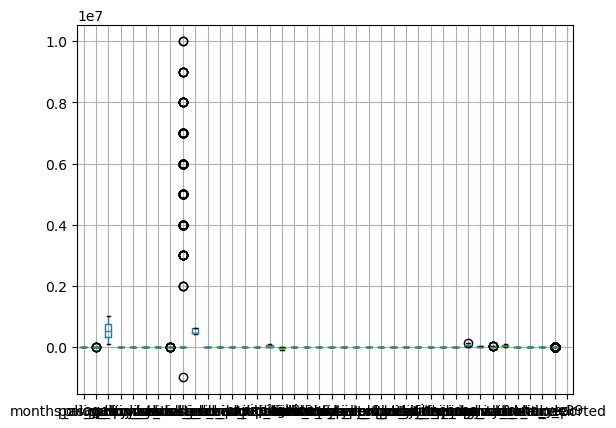

In [95]:
df.boxplot()


<Axes: xlabel='age'>

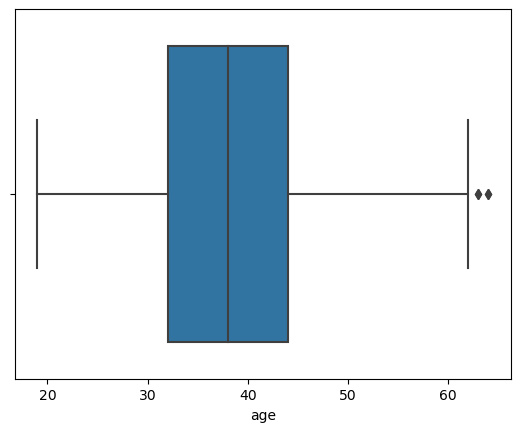

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Assuming df is your DataFrame
sns.boxplot(x=df['age'])


In [99]:
# drop column
df.drop('_c39', axis=1, inplace=True)



In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

In [101]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])


In [102]:
df['collision_type'].isnull().sum()

0

In [103]:
df['authorities_contacted']

0      3
1      3
2      3
3      3
4      4
      ..
995    1
996    1
997    3
998    2
999    3
Name: authorities_contacted, Length: 1000, dtype: int32

In [104]:
df['authorities_contacted'].isnull().sum()

0

In [105]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Outlieres using IQR 

In [106]:
q1,q3 = np.percentile(df[],[25,75])
print(q1,q3)


1.0 665.0


In [107]:
iqr = q3-q1
print(iqr)


664.0


In [175]:
df.columns

Index(['months_as_customer', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported'],
      dtype='object')

In [ ]:
q1 = df['Glucose'].quantile(0.25)
q2 = df['Glucose'].quantile(0.50)
q3 = df['Glucose'].quantile(0.75)
print(q1,q2,q3)

iqr = q3 - q1
print(f"q1 == {q1}, q2 == {q2}, q3 == {q3}")
print(iqr)
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail is :",upper_tail)
print("Lower Tail is :",lower_tail)

df.loc[(df['Glucose'] < upper_tail) & (df['Glucose'] > lower_tail)]

# Find the lower fence and upper fence 

In [108]:
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
print(lower_fence,upper_fence)

-995.0 1661.0


In [109]:
import seaborn as sns


<Axes: >

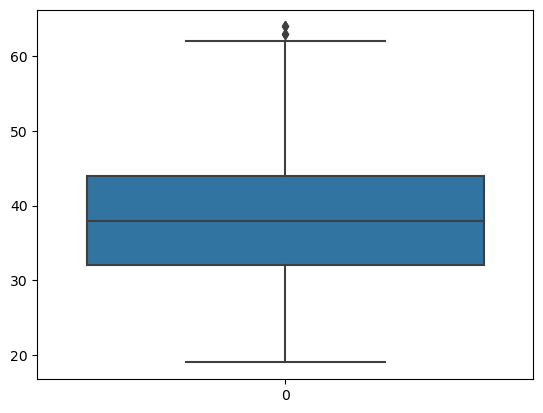

In [110]:
sns.boxplot(df['age'])

<Axes: >

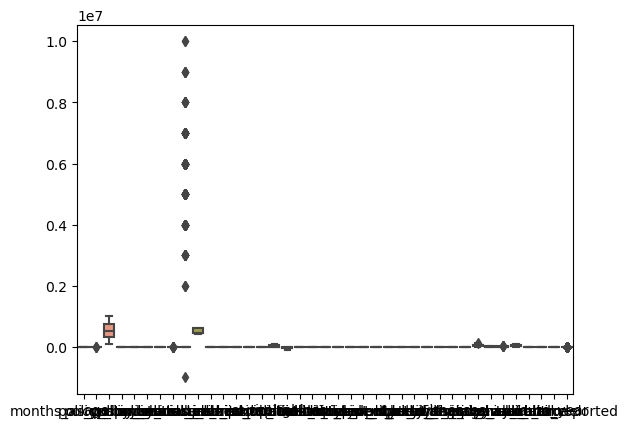

In [111]:
sns.boxplot(df)

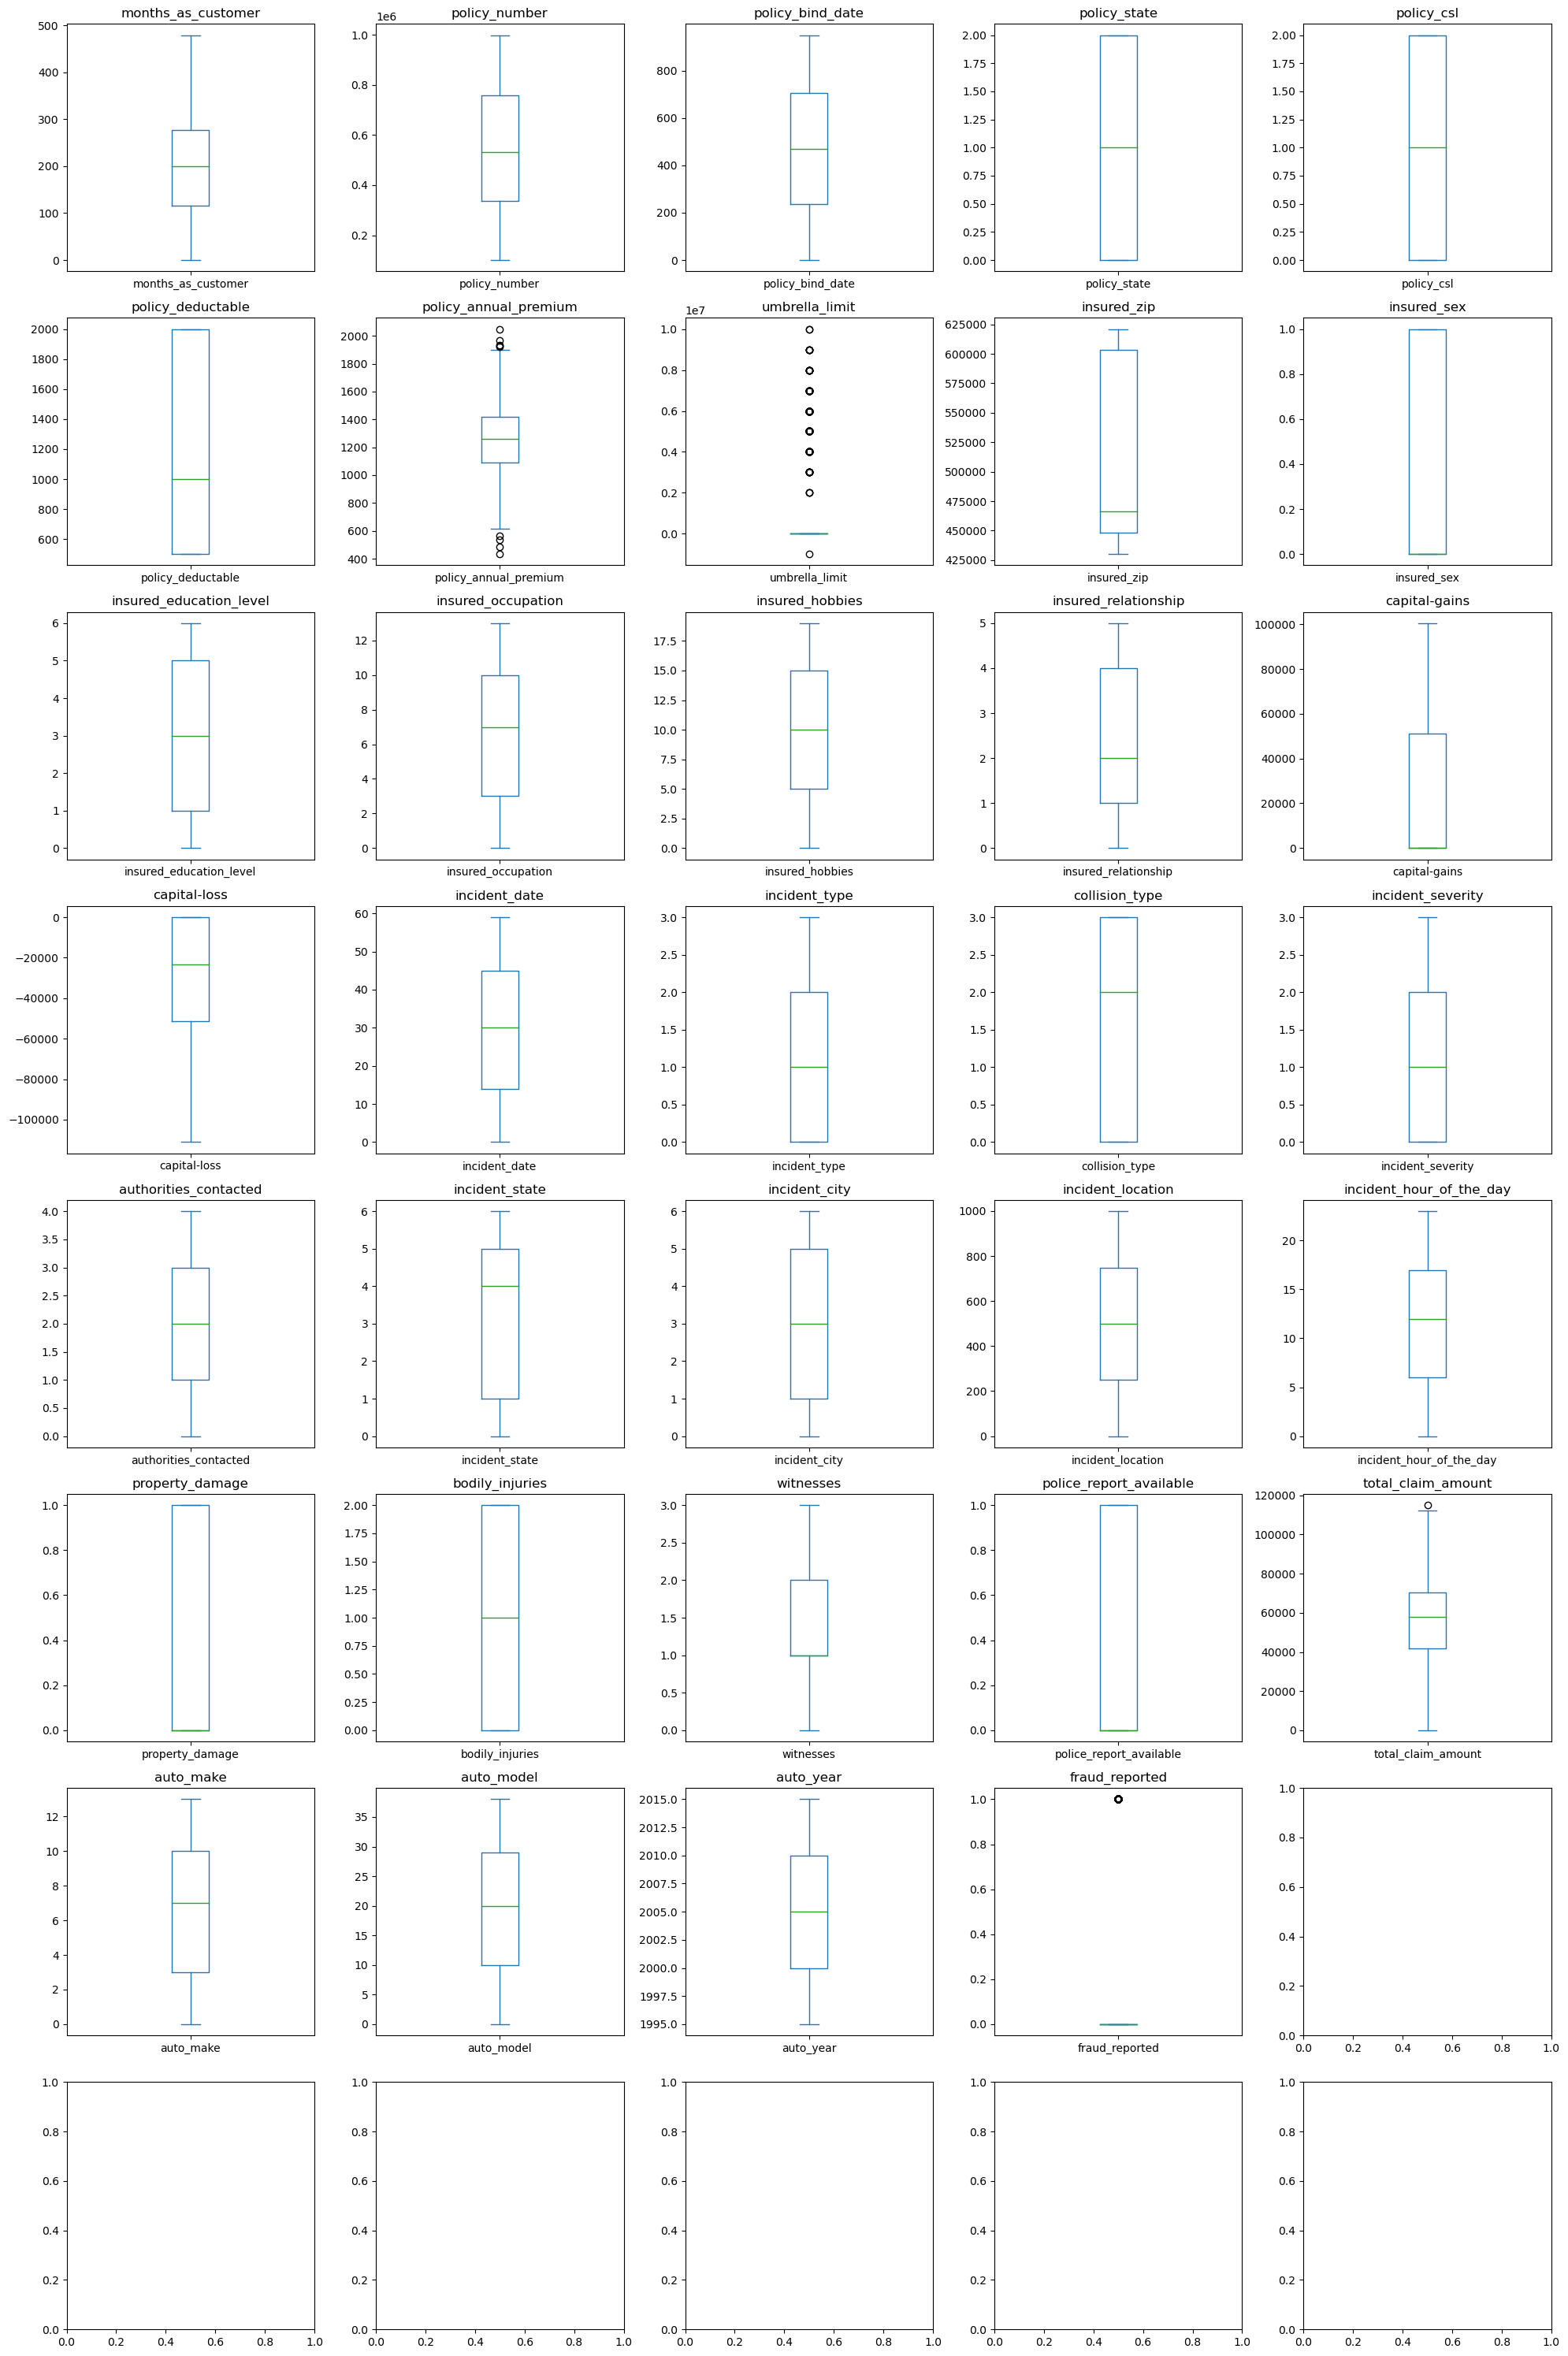

In [127]:
import matplotlib.pyplot as plt

try:
    # Assuming insurance_data is your DataFrame containing multiple columns
    fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 30))

    # Flatten the axes array to easily iterate over it
    axes = axes.flatten()

    # Loop through each column and plot a boxplot on each subplot
    for i, column in enumerate(df.columns):
        df[column].plot(kind='box', ax=axes[i])
        axes[i].set_title(column)

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

except IndexError:
    print("Number of columns in the DataFrame doesn't match the number of subplots requested.")

In [179]:
q1 = df['policy_annual_premium'].quantile(0.25)
q2 = df['policy_annual_premium'].quantile(0.50)
q3 = df['policy_annual_premium'].quantile(0.75)
print(q1,q2,q3)

iqr = q3 - q1
print(f"q1 == {q1}, q2 == {q2}, q3 == {q3}")
print(iqr)
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail is :",upper_tail)
print("Lower Tail is :",lower_tail)

df.loc[(df['policy_annual_premium'] < upper_tail) & (df['policy_annual_premium'] > lower_tail)]


0.40655006008945277 0.5103700766914872 0.6085543840521354
q1 == 0.40655006008945277, q2 == 0.5103700766914872, q3 == 0.6085543840521354
0.20200432396268259
Upper Tail is : 0.9115608699961593
Lower Tail is : 0.10354357414542886


,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,0.684760,0.468247,0.989474,1.0,0.5,0.333333,0.603112,0.090909,0.188769,1.0,...,0.217391,1.0,0.5,0.666667,1.0,0.622801,0.769231,0.026316,0.45,1.0
1,0.475992,0.269370,0.668421,0.5,0.5,1.000000,0.473214,0.545455,0.199478,1.0,...,0.347826,0.0,0.0,0.000000,0.0,0.043285,0.615385,0.315789,0.60,1.0
2,0.279749,0.653098,0.434737,1.0,0.0,1.000000,0.606972,0.545455,0.002766,0.0,...,0.304348,0.0,1.0,1.000000,0.0,0.300906,0.307692,0.789474,0.60,0.0
3,0.534447,0.141334,0.020000,0.0,0.5,1.000000,0.608582,0.636364,0.932699,0.0,...,0.217391,0.0,0.5,0.666667,0.0,0.551298,0.230769,0.894737,0.95,1.0
4,0.475992,0.296730,0.970526,0.0,1.0,0.333333,0.712760,0.636364,0.946264,1.0,...,0.869565,0.0,0.0,0.333333,0.0,0.055739,0.000000,0.815789,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.935920,0.070526,1.0,1.0,0.333333,0.543574,0.090909,0.006209,0.0,...,0.869565,1.0,0.0,0.333333,0.0,0.758579,0.461538,0.157895,0.55,0.0
996,0.594990,0.095846,0.954737,0.0,0.0,0.333333,0.621622,0.090909,0.933013,0.0,...,1.000000,1.0,1.0,1.000000,0.0,0.943912,1.000000,0.736842,1.00,0.0
997,0.271399,0.909953,0.541053,1.0,0.5,0.000000,0.588604,0.363636,0.066505,0.0,...,0.173913,0.0,1.0,1.000000,1.0,0.587006,0.846154,0.500000,0.05,0.0
998,0.956159,0.481995,0.874737,0.0,1.0,1.000000,0.572145,0.545455,0.060831,1.0,...,0.086957,0.0,0.0,0.333333,1.0,0.408291,0.076923,0.131579,0.15,0.0


# IQR in dataframe remove outliers

In [178]:
q1 = df['policy_annual_premium'].quantile(0.25)
q3 = df['policy_annual_premium'].quantile(0.75)
iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

# Filtering the DataFrame to remove values outside the upper and lower tails
dfx = df[(df['policy_annual_premium'] >= lower_tail) & (df['policy_annual_premium'] <= upper_tail)]

print(dfx)


     months_as_customer  policy_number  policy_bind_date  policy_state  \
0              0.684760       0.468247          0.989474           1.0   
1              0.475992       0.269370          0.668421           0.5   
2              0.279749       0.653098          0.434737           1.0   
3              0.534447       0.141334          0.020000           0.0   
4              0.475992       0.296730          0.970526           0.0   
..                  ...            ...               ...           ...   
995            0.006263       0.935920          0.070526           1.0   
996            0.594990       0.095846          0.954737           0.0   
997            0.271399       0.909953          0.541053           1.0   
998            0.956159       0.481995          0.874737           0.0   
999            0.951983       0.506633          0.297895           1.0   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           0.5           0.333333

# Features Selection

#  Feature Selection _Corelation

In [112]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,940,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


In [113]:
X = df.drop("months_as_customer",axis=1)
y = df["months_as_customer"]

In [114]:
X.head()

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,48,521585,940,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,42,342868,635,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,29,687698,413,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,41,227811,19,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,44,367455,922,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0


In [115]:
# seperate data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
X,
y,
test_size=0.3,
random_state=0)
X_train.shape,X_test.shape

((700, 38), (300, 38))

In [116]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,470.503000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,274.370077,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,235.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,468.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,707.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


# Using corr() to convert all data in 0 to 1

In [117]:
X_train.corr()

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
age,1.000000,0.059311,-0.041581,-0.023257,-0.011476,0.022840,0.017283,0.004177,-0.014994,0.120690,...,0.048749,0.001755,0.053093,0.052419,0.056003,0.046236,0.032988,0.003960,0.020694,-0.001428
policy_number,0.059311,1.000000,-0.015559,0.068834,-0.020707,-0.020005,0.034449,-0.015035,0.000382,-0.001457,...,-0.003425,0.070340,0.008211,0.006638,0.003685,0.008800,-0.000386,0.086960,-0.010212,-0.023512
policy_bind_date,-0.041581,-0.015559,1.000000,0.008813,-0.012434,-0.056062,0.021367,0.021241,0.046983,-0.001696,...,0.031423,-0.049301,-0.000199,-0.000703,0.007258,-0.001949,0.019737,0.019767,-0.012524,-0.005560
policy_state,-0.023257,0.068834,0.008813,1.000000,-0.003877,0.040847,0.020144,-0.023073,0.024302,-0.011417,...,0.025431,0.104588,-0.013794,-0.061656,-0.000699,-0.003147,0.023692,-0.066246,-0.008876,0.067888
policy_csl,-0.011476,-0.020707,-0.012434,-0.003877,1.000000,-0.004157,0.044675,0.029631,0.033529,0.006002,...,0.086559,-0.020097,-0.053567,-0.080848,-0.054764,-0.039873,-0.021484,0.048517,-0.024839,-0.032171
policy_deductable,0.022840,-0.020005,-0.056062,0.040847,-0.004157,1.000000,0.004690,-0.005374,0.009724,-0.021352,...,0.113311,0.039966,0.027929,0.039097,0.085286,0.007092,-0.058271,-0.024493,0.007354,0.003930
policy_annual_premium,0.017283,0.034449,0.021367,0.020144,0.044675,0.004690,1.000000,-0.021371,0.043381,0.042142,...,0.034019,0.040983,0.011734,-0.014195,0.000610,0.019879,-0.028092,-0.011266,-0.049725,-0.016595
umbrella_limit,0.004177,-0.015035,0.021241,-0.023073,0.029631,-0.005374,-0.021371,1.000000,0.020666,0.011041,...,-0.058203,-0.030212,-0.069909,-0.058888,-0.050432,-0.069447,0.000344,0.012796,0.039035,0.057675
insured_zip,-0.014994,0.000382,0.046983,0.024302,0.033529,0.009724,0.043381,0.020666,1.000000,-0.043636,...,0.048984,0.014965,-0.068524,-0.055172,-0.031701,-0.073257,-0.026411,0.018602,-0.049118,0.000834
insured_sex,0.120690,-0.001457,-0.001696,-0.011417,0.006002,-0.021352,0.042142,0.011041,-0.043636,1.000000,...,0.021248,0.023049,-0.022329,-0.003402,-0.014148,-0.026660,0.018403,-0.000514,-0.055316,0.043671


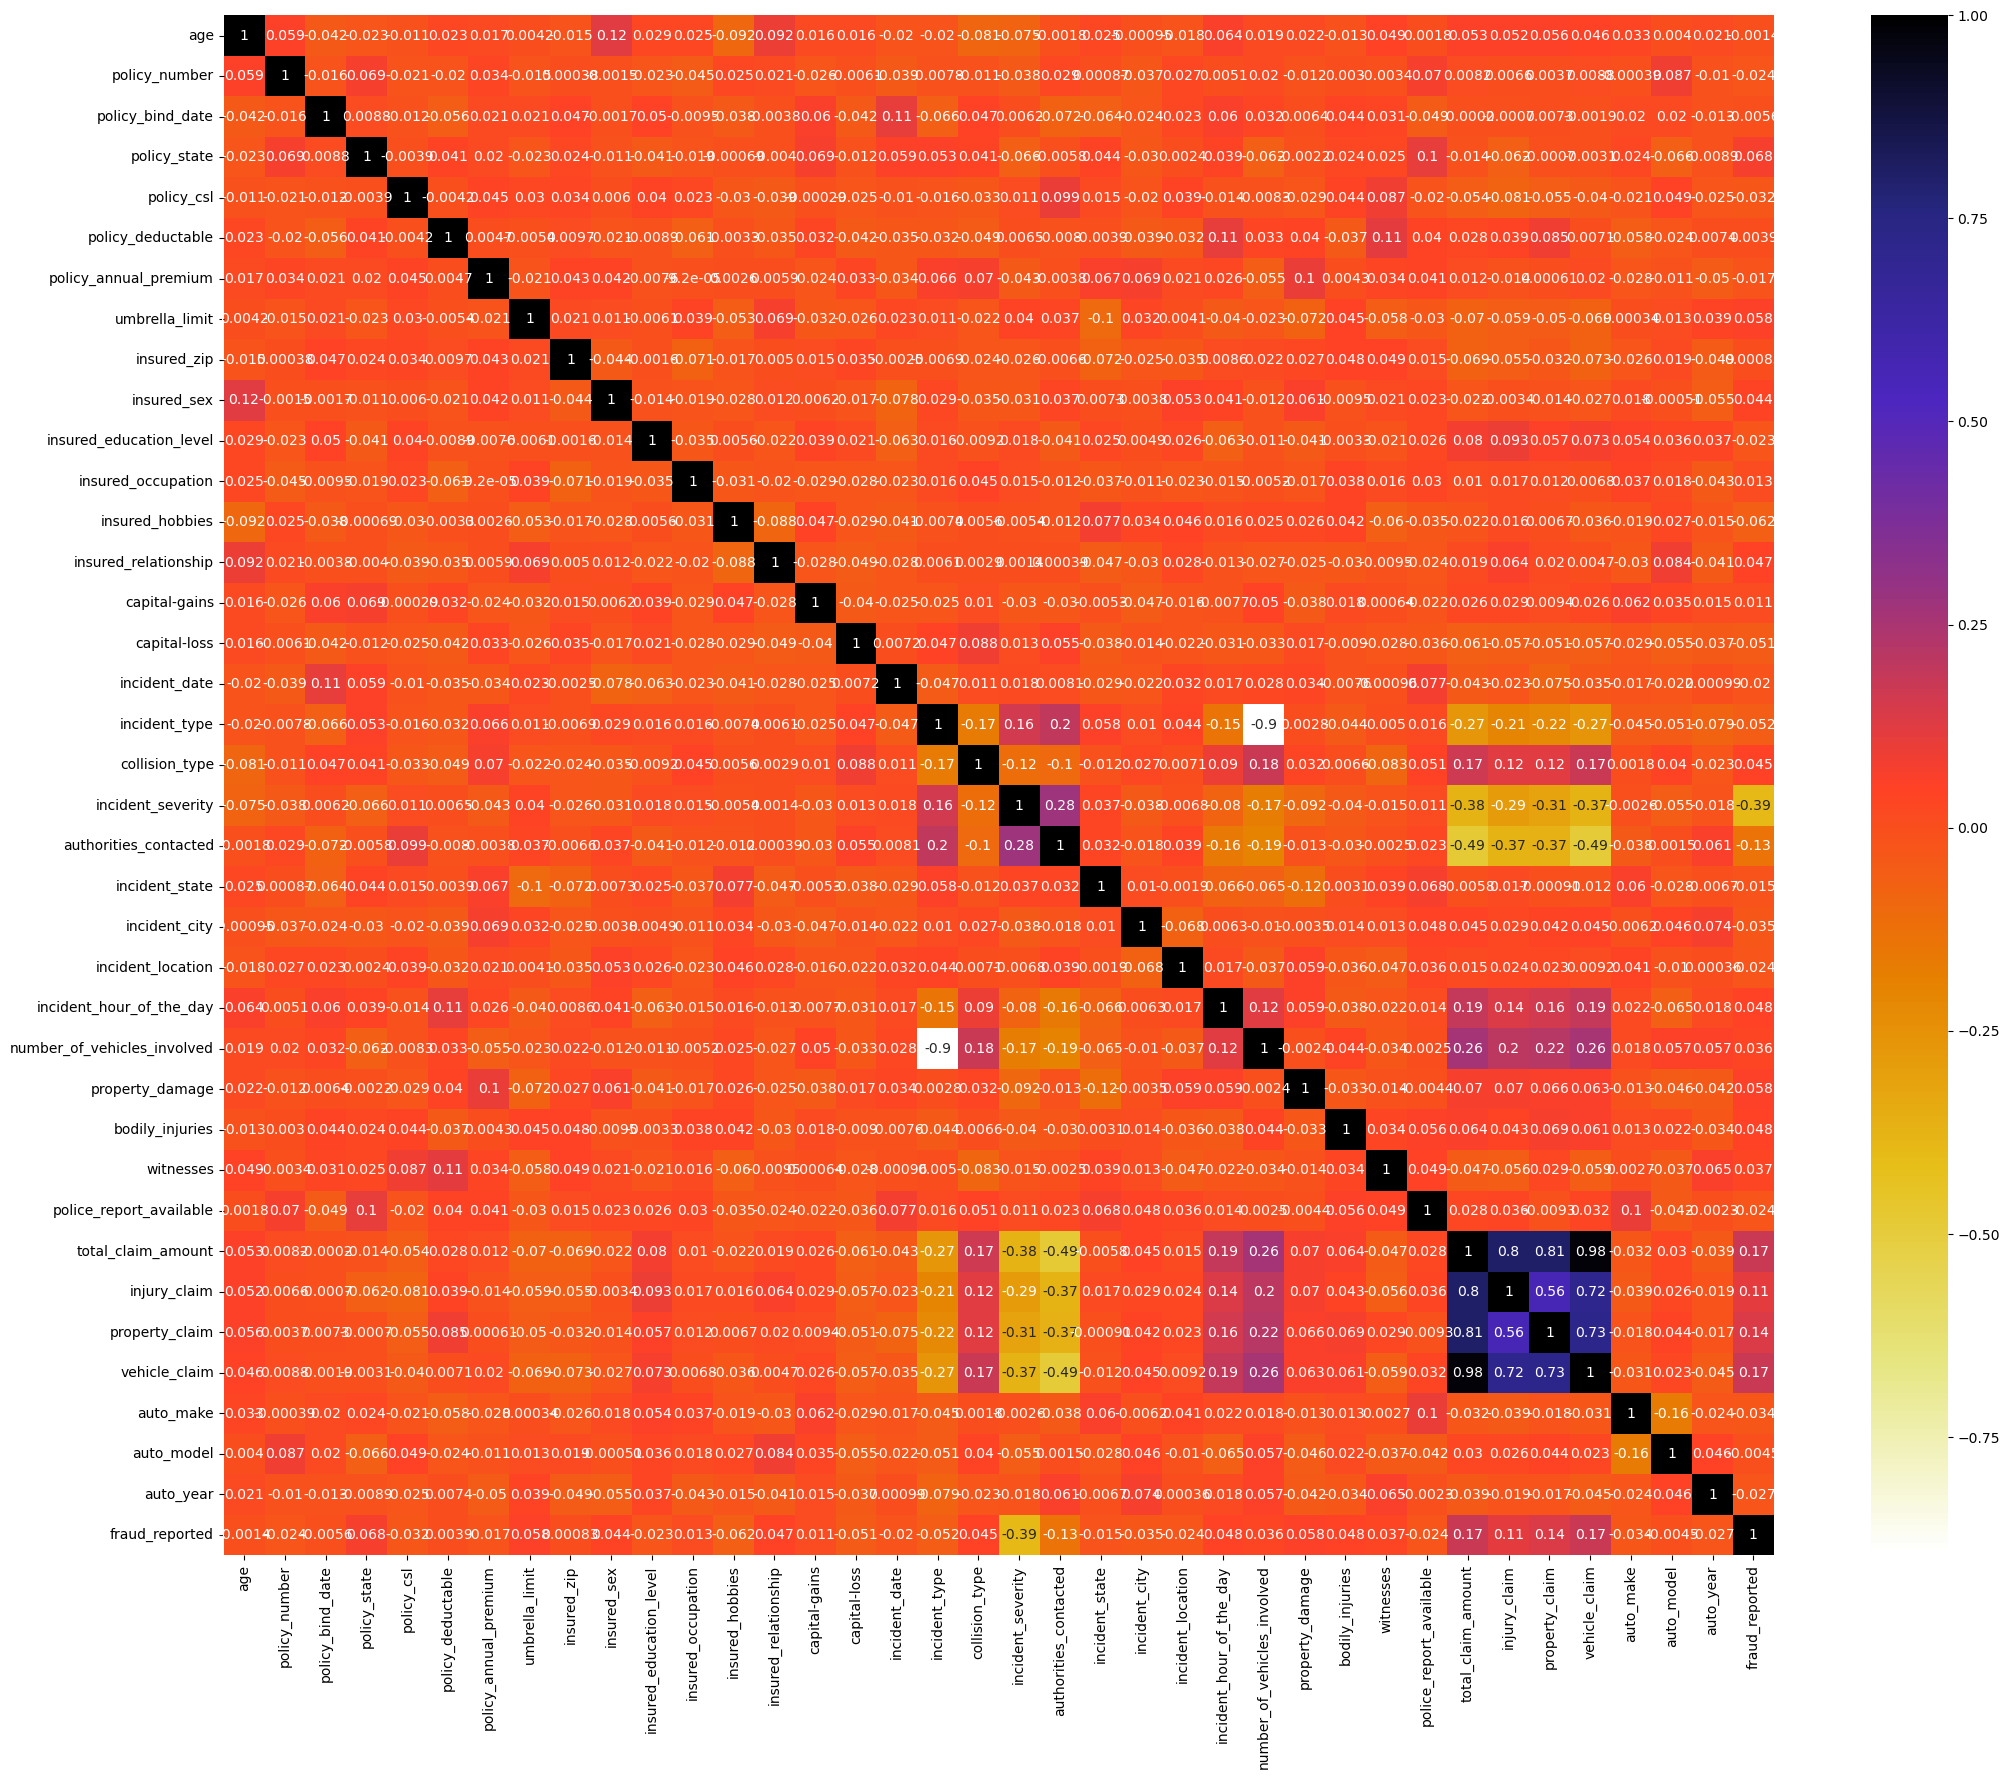

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt  

# Assuming X_train is defined elsewhere in your code
plt.figure(figsize=(25, 20))  # Using plt.figure() from matplotlib.pyplot
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)  # Using plt.cm.CMRmap_r colormap from matplotlib.pyplot
plt.show()


# Corelation using remove the un-nessesary columns

In [119]:

threshold=0.8

In [120]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [121]:

core_data = correlation(df.iloc[:,:-1],threshold)

In [122]:

print(core_data)

{'vehicle_claim', 'age', 'injury_claim', 'property_claim', 'number_of_vehicles_involved'}


In [123]:
df.drop(core_data,axis=1,inplace=True)

In [124]:
df.columns

Index(['months_as_customer', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1000 non-null   int64  
 1   policy_number             1000 non-null   int64  
 2   policy_bind_date          1000 non-null   int32  
 3   policy_state              1000 non-null   int32  
 4   policy_csl                1000 non-null   int32  
 5   policy_deductable         1000 non-null   int64  
 6   policy_annual_premium     1000 non-null   float64
 7   umbrella_limit            1000 non-null   int64  
 8   insured_zip               1000 non-null   int64  
 9   insured_sex               1000 non-null   int32  
 10  insured_education_level   1000 non-null   int32  
 11  insured_occupation        1000 non-null   int32  
 12  insured_hobbies           1000 non-null   int32  
 13  insured_relationship      1000 non-null   int32  
 14  capital-g

In [126]:
# sns.pairplot(df)

# Wrapper

In [128]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define features (X) and target variable (y)
X = df.drop('months_as_customer', axis=1)  # Exclude target variable and irrelevant features if needed
y = df['months_as_customer']

# Create the RFE model and specify the algorithm you want to use (e.g., Logistic Regression)
estimator = LogisticRegression()

# Specify the number of features you want to select (optional, default is half of the features)
num_features_to_select = 10

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected features:")
print(selected_features)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected features:
Index(['policy_number', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_location', 'total_claim_amount', 'auto_year'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
type(df['months_as_customer'])


pandas.core.series.Series

# Embedded method - LASSO Regularization (L1)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Create a logistic regression model
logreg = LogisticRegression(C=1, penalty="l1", solver="liblinear", random_state=7).fit(X, y)
model = SelectFromModel(logreg, prefit=True)
X_new = model.transform(X)

# Get selected columns
selected_columns = X.columns[model.get_support()]
print("Selected columns:", selected_columns)


Selected columns: Index(['policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Random Forest Importance

<Axes: >

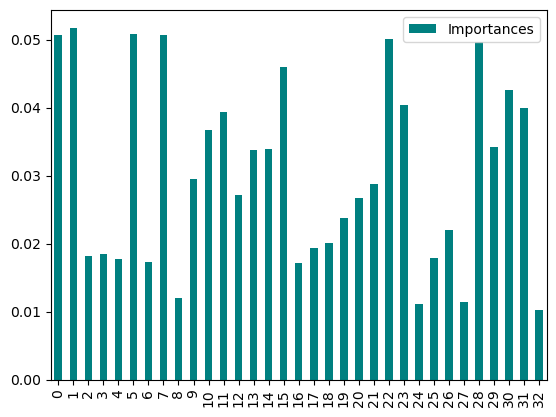

In [131]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300)
model.fit(X,y)

importances = model.feature_importances_

final_df = pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importances":importances})
final_df.set_index("Importances")
final_df.plot.bar(color = 'teal')

# Scalig

In [140]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [142]:
normal_scaler = MinMaxScaler()
x_scaled = normal_scaler.fit_transform(df)
df = pd.DataFrame(x_scaled,columns = df.columns)
df

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,0.684760,0.468247,0.989474,1.0,0.5,0.333333,0.603112,0.090909,0.188769,1.0,...,0.217391,1.0,0.5,0.666667,1.0,0.622801,0.769231,0.026316,0.45,1.0
1,0.475992,0.269370,0.668421,0.5,0.5,1.000000,0.473214,0.545455,0.199478,1.0,...,0.347826,0.0,0.0,0.000000,0.0,0.043285,0.615385,0.315789,0.60,1.0
2,0.279749,0.653098,0.434737,1.0,0.0,1.000000,0.606972,0.545455,0.002766,0.0,...,0.304348,0.0,1.0,1.000000,0.0,0.300906,0.307692,0.789474,0.60,0.0
3,0.534447,0.141334,0.020000,0.0,0.5,1.000000,0.608582,0.636364,0.932699,0.0,...,0.217391,0.0,0.5,0.666667,0.0,0.551298,0.230769,0.894737,0.95,1.0
4,0.475992,0.296730,0.970526,0.0,1.0,0.333333,0.712760,0.636364,0.946264,1.0,...,0.869565,0.0,0.0,0.333333,0.0,0.055739,0.000000,0.815789,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.935920,0.070526,1.0,1.0,0.333333,0.543574,0.090909,0.006209,0.0,...,0.869565,1.0,0.0,0.333333,0.0,0.758579,0.461538,0.157895,0.55,0.0
996,0.594990,0.095846,0.954737,0.0,0.0,0.333333,0.621622,0.090909,0.933013,0.0,...,1.000000,1.0,1.0,1.000000,0.0,0.943912,1.000000,0.736842,1.00,0.0
997,0.271399,0.909953,0.541053,1.0,0.5,0.000000,0.588604,0.363636,0.066505,0.0,...,0.173913,0.0,1.0,1.000000,1.0,0.587006,0.846154,0.500000,0.05,0.0
998,0.956159,0.481995,0.874737,0.0,1.0,1.000000,0.572145,0.545455,0.060831,1.0,...,0.086957,0.0,0.0,0.333333,1.0,0.408291,0.076923,0.131579,0.15,0.0


# Train and Testing Alogorithams

In [143]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data

In [150]:

# Split data into features (X) and target variable (y)
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter

In [172]:
# Define models and hyperparameters
models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}),
    'SVM': (SVC(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]})
}

# Train model and Evaluate model

# SVM and RandomForest

In [157]:


# Train models and evaluate
for name, (model, params) in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Predictions
    train_preds = best_model.predict(X_train)
    test_preds = best_model.predict(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    print(f"{name} Training Accuracy: {train_accuracy}")
    print(f"{name} Testing Accuracy: {test_accuracy}")

    # Other metrics
    print(f"{name} Classification Report (Testing):\n{classification_report(y_test, test_preds)}")
    print(f"{name} Confusion Matrix (Testing):\n{confusion_matrix(y_test, test_preds)}")
    print("--------------------------------------------------")


Training RandomForest...
RandomForest Training Accuracy: 1.0
RandomForest Testing Accuracy: 0.74
RandomForest Classification Report (Testing):
              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84       145
         1.0       0.56      0.25      0.35        55

    accuracy                           0.74       200
   macro avg       0.66      0.59      0.59       200
weighted avg       0.71      0.74      0.70       200

RandomForest Confusion Matrix (Testing):
[[134  11]
 [ 41  14]]
--------------------------------------------------
Training SVM...
SVM Training Accuracy: 0.81875
SVM Testing Accuracy: 0.78
SVM Classification Report (Testing):
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       145
         1.0       0.59      0.65      0.62        55

    accuracy                           0.78       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.79      0.7

# KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier  # import lib

In [173]:
# Define models and hyperparameters
models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}),
    'SVM': (SVC(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']})
}

In [174]:
# Train models and evaluate
for name, (model, params) in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Predictions
    train_preds = best_model.predict(X_train)
    test_preds = best_model.predict(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    print(f"{name} Training Accuracy: {train_accuracy}")
    print(f"{name} Testing Accuracy: {test_accuracy}")

    # Other metrics
    print(f"{name} Classification Report (Testing):\n{classification_report(y_test, test_preds)}")
    print(f"{name} Confusion Matrix (Testing):\n{confusion_matrix(y_test, test_preds)}")
    print("--------------------------------------------------")


Training RandomForest...
RandomForest Training Accuracy: 0.98375
RandomForest Testing Accuracy: 0.755
RandomForest Classification Report (Testing):
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       145
         1.0       0.62      0.27      0.38        55

    accuracy                           0.76       200
   macro avg       0.70      0.61      0.61       200
weighted avg       0.73      0.76      0.72       200

RandomForest Confusion Matrix (Testing):
[[136   9]
 [ 40  15]]
--------------------------------------------------
Training SVM...
SVM Training Accuracy: 0.81875
SVM Testing Accuracy: 0.78
SVM Classification Report (Testing):
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       145
         1.0       0.59      0.65      0.62        55

    accuracy                           0.78       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.79    